# Using LogisticRegression model to predict graduate admissions

In [1]:
# import required libraries

import pandas as pd   #for dataframe manupulation

import numpy as np    #for calculation

import seaborn as sns   #for visualising

import matplotlib.pyplot as plt  #for visualising

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive\Admission_Predict_Ver1.1.csv")   #read csv file

# Data exploration

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.drop(columns=['Serial No.'], inplace=True)


In [5]:
df.head() #This method displays the first few rows of the DataFrame. By default, it shows the first five rows

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.tail()  #method displays the last few rows of the DataFrame. By default, it shows the last five rows.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [7]:
df.columns   #give columns name

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.sample() #randomly selects a specified number of rows from the DataFrame and displays them.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
101,312,105,2,2.5,3.0,8.12,0,0.64


In [9]:
df.shape   #giving the number of rows and columns.

(500, 8)

In [10]:
df.shape[0]  # to know number of rows

500

In [11]:
df.shape[1]  # to know number of columns

8

In [12]:
df.dtypes  #provides information about the data types of each column in a DataFrame. 

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
df.describe() # discriptive statistic of data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [15]:
df.count()    # to know number of rows are present in every columns

GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

In [16]:
df.count().sum()   # total numbers of row in all columns

4000

# Data preprocessing

In [17]:
df.duplicated()   #Check for duplicates values in the DataFrame in each columns

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [18]:
df.duplicated().sum()    #give the total count of duplicates values in the entire DataFrame.

0

In [19]:
df.isnull().sum()   #Check for missing values in the DataFrame in each columns

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
df.isnull().sum().sum()  #give the total count of missing values in the entire DataFrame.

0

# Checking outlier

<function matplotlib.pyplot.show(close=None, block=None)>

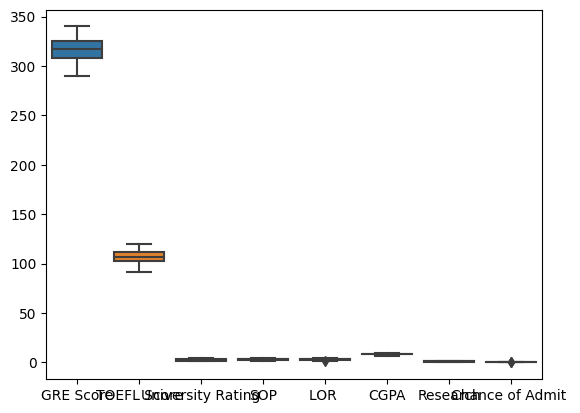

In [21]:
sns.boxplot(data=df)
plt.show

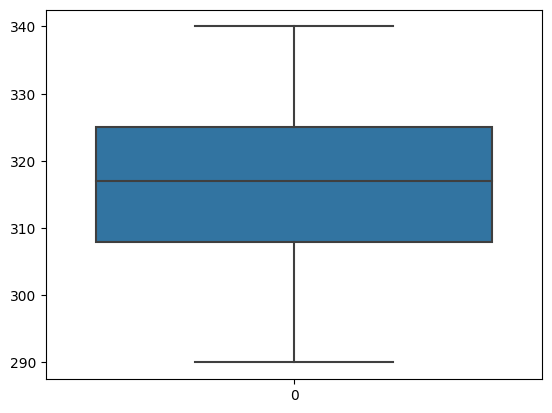

In [22]:
sns.boxplot(df["GRE Score"])
plt.show()

<Axes: >

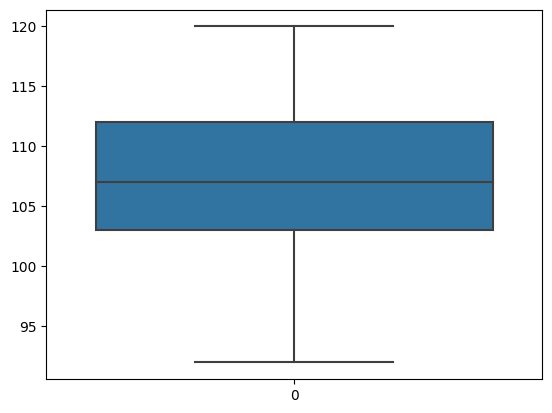

In [23]:
sns.boxplot(df["TOEFL Score"])

<Axes: >

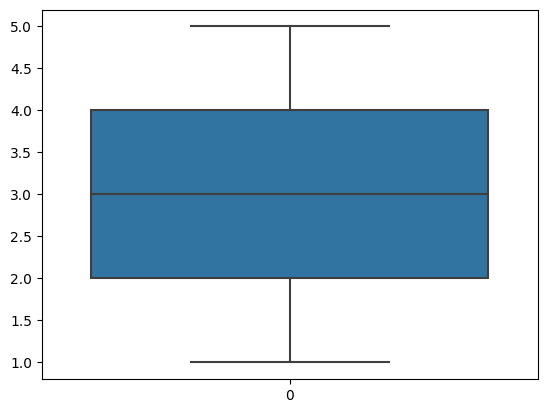

In [24]:
sns.boxplot(df["University Rating"])

<Axes: >

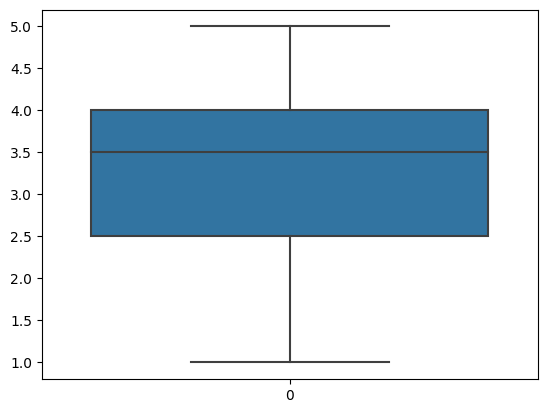

In [25]:
sns.boxplot(df["SOP"])

<Axes: >

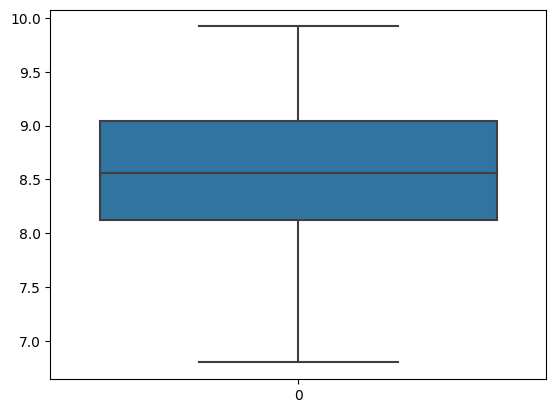

In [26]:
sns.boxplot(df["CGPA"])

# Data  Visualization

In [27]:
corr_matrix = df.corr()


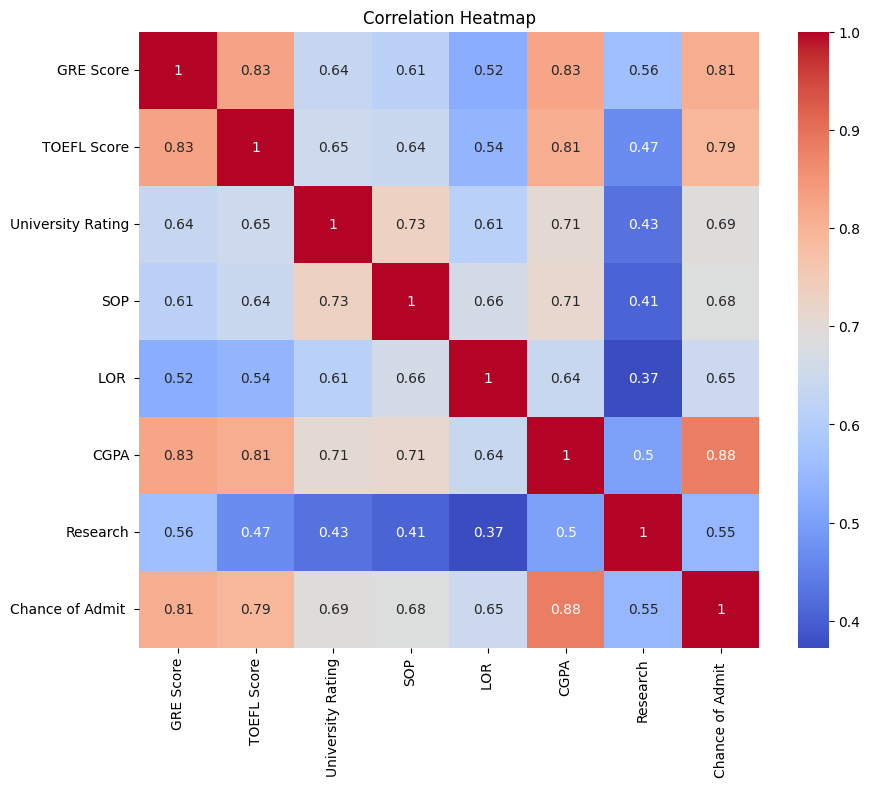

In [28]:
plt.figure(figsize=(10, 8))  #Size of the figure
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')  #Title of the heatmap
plt.show()


<Axes: ylabel='Frequency'>

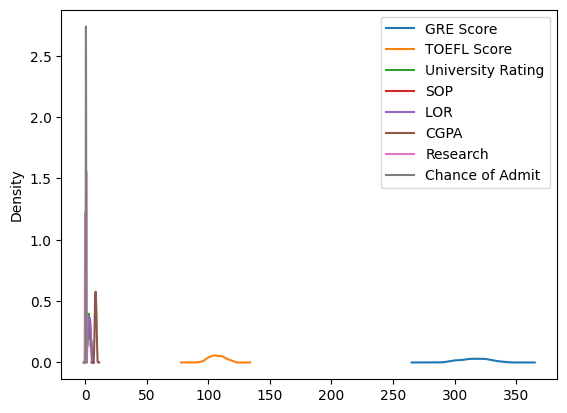

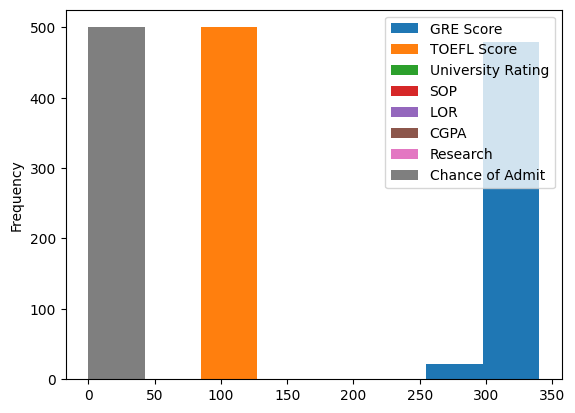

In [29]:
# Density plot
df.plot(kind='density')
# Histogram
df.plot(kind='hist', bins=8)  


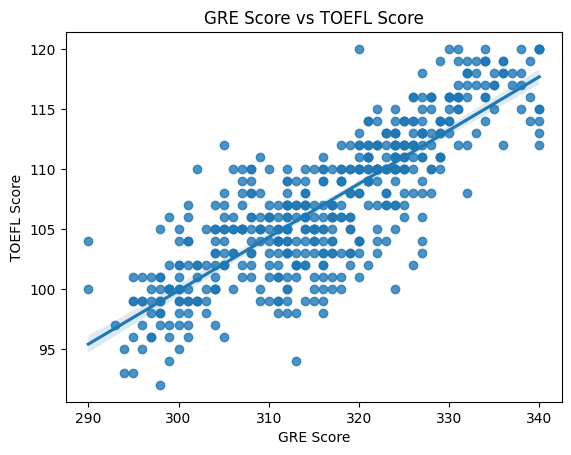

In [30]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

In [31]:
#higher the GRE Score, higher the TOEFL Score because both TOEFL and GRE have a verbal section

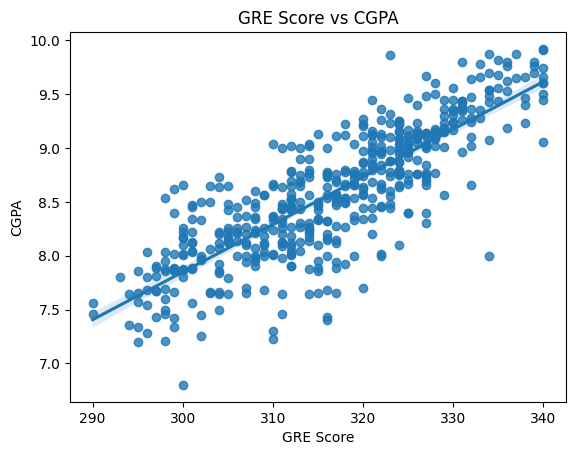

In [32]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

In [33]:
#exceptions : people with higher CGPA usually have higher GRE scores

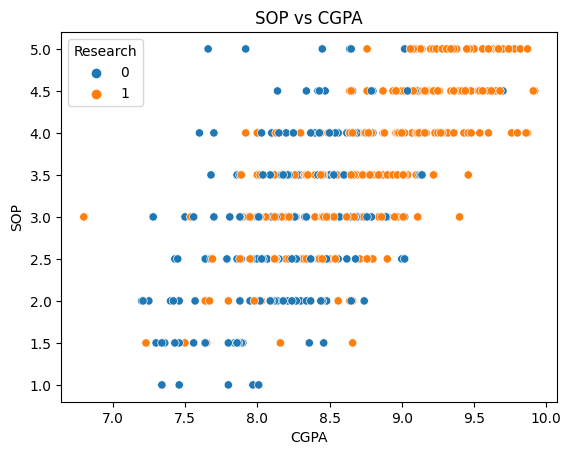

In [34]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df, hue="Research")
plt.title("SOP vs CGPA")
plt.show()

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
#Lets see the distribution of the variables of graduate applicants.

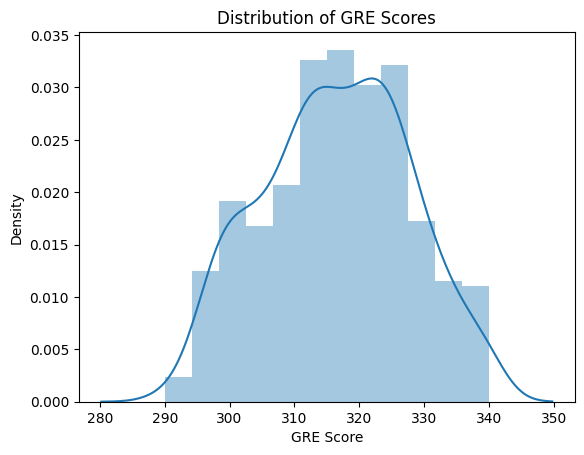

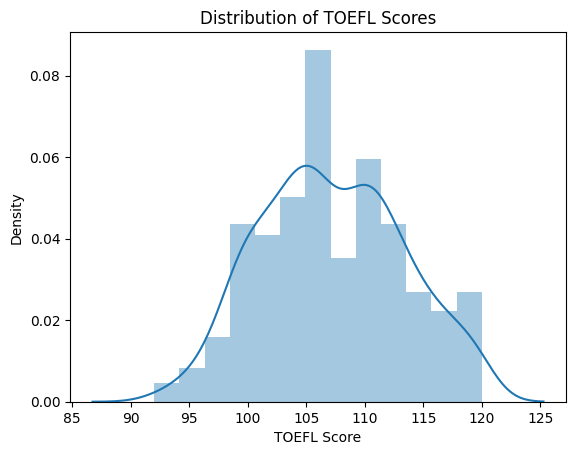

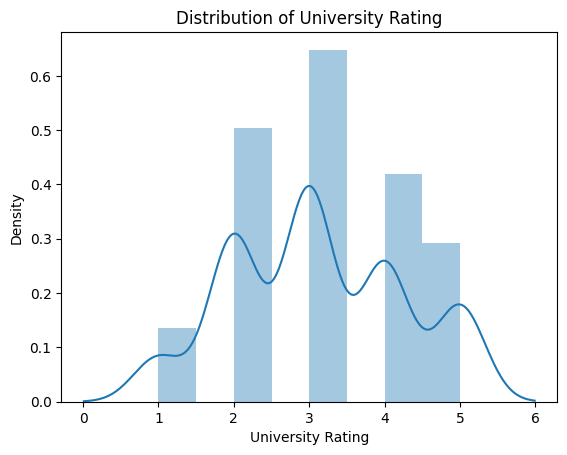

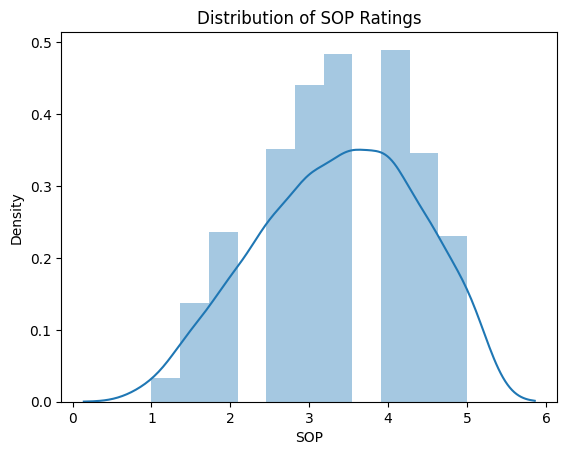

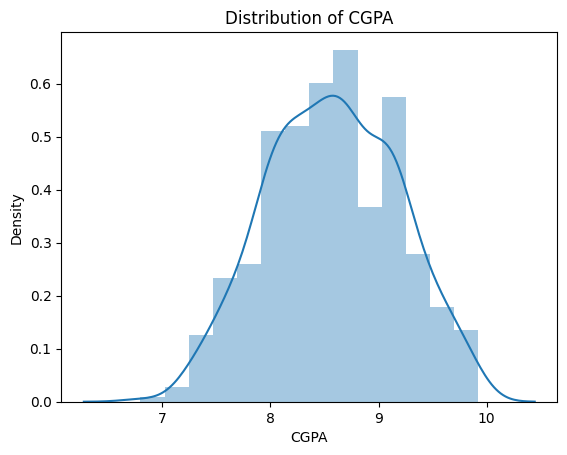

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=True)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=True)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

# Applying LogisticRegression model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [39]:
df1 = df.copy()

In [40]:
X = df1.drop(columns=['Chance of Admit '],axis =1)
y = df1['Chance of Admit ']

# Splitting the data into test and train

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=90,test_size=0.15)

In [42]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(425, 7)
(425,)
(75, 7)
(75,)


In [43]:
# Converting Target variable to binary
# Accepctance percentage is 80%

ytrain_t = [ 1 if i > 0.80 else 0 for i in ytrain]
ytest_t = [ 1 if i > 0.80 else 0 for i in ytest]

In [44]:
#Using Logistic regression to predict the graduate admissions

lr = LogisticRegression()
lr.fit(xtrain,ytrain_t)

LogisticRegression()

In [45]:
y_pred = lr.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1])

In [46]:
print(classification_report(ytest_t,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.86      0.71      0.77        17

    accuracy                           0.91        75
   macro avg       0.89      0.84      0.86        75
weighted avg       0.90      0.91      0.90        75



In [47]:
# We get an accuracy score of about 91%
# which means the LogisticRegression model predicts the graduate admission with 91% accuracy.

# Feature Importance

In [48]:
# Extract coefficients from the logistic regression model
coefficients = lr.coef_[0]

# Create a DataFrame to store the feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})

# Sort the features by their absolute coefficient values in descending order
feature_importance_df['Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance DataFrame
print(feature_importance_df)

             Feature  Importance
5               CGPA    2.954183
6           Research    2.356403
2  University Rating    0.931454
3                SOP    0.763923
1        TOEFL Score    0.201271
0          GRE Score    0.173710
4               LOR     0.048445


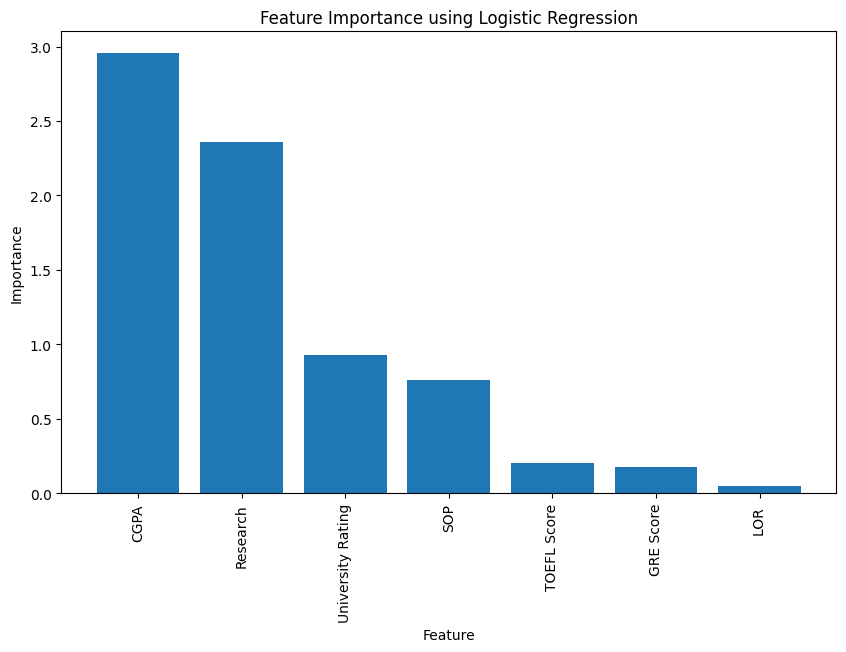

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance using Logistic Regression')
plt.show()